## Key findings and achievements
> * For the purpose of providing more technical insights to fans, we demonstrate how public race data can be used to extract important information on race and rider performance.
> * We demonstrate how to **quantify the performances** of riders, teams, and constructors through **quantitative indicators** that take into account **relative speed and consistency**, the two fundamental variables in a theoretical definition of race performance.

___

## Introduction

Sports are being radically transformed by data collection and analysis, benefiting both professionals and fans. Soccer, baseball, and American football are some examples where player performance data is utilized to acquire talent and provide in-depth statistics for the public. In contrast, data analysis for motorsports fans is not yet widespread, despite being fundamental to the sport's operation. 

In this notebook, we will explore the realm of MotoGP racing and analyze publicly available race data with the aim of comprehending how it can be used to provide fans with essential **insights on riders' performance**. By employing statistical methodologies, we will extract as much insights as possible from the openly accessible data, contending that it is possible to gauge the riders' objective performances within a race and across the championship. At the same time, we will propose potential data analyses – presented as a "post-GP" information product – that can be used by the media to interpret Grand Prix outcomes and which can spark engaging discussions on the competitors' performance levels and progress.

> *Data is provided thanks to the [motogpdata](https://github.com/antobzzll/motogpdata) project.*

In [1]:
import motogpdata.handler as mgphandler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Race Results

For the scope of this study, we will take into account and examine two races from the 2022 MotoGP season, namely the Qatar Grand Prix and the Italian Grand Prix. Let's first refresh our memory of the results of these races.

For the Qatar Grand Prix:

In [2]:
season = mgphandler.Season(2022, 'MotoGP')
qat2022 = mgphandler.Event(season, 'QAT')
ita2022 = mgphandler.Event(season, 'ITA')

results_subset = ['rider.full_name', 'position', 'average_speed', 'total_laps', 'time', 'points']
qat2022.results()[results_subset].set_index('rider.full_name')

,position,average_speed,total_laps,time,points
rider.full_name,,,,,
Enea Bastianini,1.0,168.2,22,42:13.1980,25
Brad Binder,2.0,168.1,22,42:13.5440,20
Pol Espargaro,3.0,168.1,22,42:14.5490,16
Aleix Espargaro,4.0,168.0,22,42:15.4400,13
Marc Marquez,5.0,167.9,22,42:17.2970,11
Joan Mir,6.0,167.8,22,42:18.0410,10
Alex Rins,7.0,167.6,22,42:22.0080,9
Johann Zarco,8.0,167.5,22,42:23.7340,8
Fabio Quartararo,9.0,167.5,22,42:23.7410,7


For the Italian Grand Prix:

In [3]:
ita2022.results()[results_subset].set_index('rider.full_name')

,position,average_speed,total_laps,time,points
rider.full_name,,,,,
Francesco Bagnaia,1.0,175.1,23,41:18.9230,25
Fabio Quartararo,2.0,175.1,23,41:19.5580,20
Aleix Espargaro,3.0,175.0,23,41:20.9060,16
Johann Zarco,4.0,175.0,23,41:21.5130,13
Marco Bezzecchi,5.0,174.9,23,41:21.9900,11
Luca Marini,6.0,174.9,23,41:22.7980,10
Brad Binder,7.0,174.9,23,41:22.9900,9
Takaaki Nakagami,8.0,174.4,23,41:29.8670,8
Miguel Oliveira,9.0,174.3,23,41:30.1790,7


The traditional race classification tables (which represent the only type of data considered by most of the media when convering races) do not provide many analytical insights nor objective indicators of riders performances. They merely offer a snapshot of the race outcome; and the final result does not provide a comprehensive evaluation of the competitors' achievements in the race.

It is in fact possible for a rider to finish a race in a certain position thanks to the mistakes of others, even if he has maintained an anonymous performance throughout the competition. In such situations, the most common question that arises is whether or not the rider "deserved" or not the position he achieved at the end of the race. In other words, we ask: what was the rider's performance after accounting for the race events? How can we measure and evaluate his performance regardless of the result obtained?

## Laptime analysis

A statistical assessment of race performance is required to address these inquiries, which entails an evaluation based on factual data rather than subjective sentiments or judgments. To accomplish this, the data on lap times must be taken into account, scrutinizing the race's overall progress. An illustration of such data for the Qatar race is presented below.

In [4]:
# Extract race analysis data for the Qatar Grand Prix
timesheetQAT, laptimes_ridersQAT, laptimes_teamsQAT, laptimes_constructorsQAT, performanceQAT = qat2022.race_analysis(save_pdf=False, performance=True)
laptimes_ridersQAT_melted = laptimes_ridersQAT.melt(id_vars='lap', var_name='rider', value_name='laptime')

laptimes_ridersQAT.head()

rider,Aleix Espargaro,Alex Marquez,Alex Rins,Andrea Dovizioso,Brad Binder,Darryn Binder,Enea Bastianini,Fabio Di Giannantonio,Fabio Quartararo,Francesco Bagnaia,...,Marc Marquez,Marco Bezzecchi,Maverick Viñales,Miguel Oliveira,Pol Espargaro,Raul Fernandez,Remy Gardner,Takaaki Nakagami,avg_laptime,lap
lap,,,,,,,,,,,,,,,,,,,,,
1,121.559,122.479,122.363,123.815,121.021,124.531,121.438,125.299,122.042,121.817,...,120.713,122.419,124.207,122.558,120.669,125.229,125.051,122.755,122.863542,1
2,115.237,116.054,115.487,116.887,115.086,116.721,114.953,116.269,115.415,115.135,...,115.265,116.229,116.618,116.259,115.181,116.272,116.173,115.975,115.839625,2
3,114.797,115.223,114.610,115.858,114.846,115.720,114.918,115.982,115.007,114.771,...,114.875,115.636,116.134,115.488,114.797,116.531,115.974,115.909,115.377417,3
4,115.000,115.329,114.706,115.860,115.069,115.591,114.991,116.212,115.171,115.223,...,115.032,116.318,116.044,115.057,115.076,116.106,116.167,116.029,115.478208,4
5,114.944,115.328,115.013,117.290,114.867,116.474,114.956,116.228,115.236,115.105,...,114.867,115.520,116.015,115.097,114.753,116.326,116.210,115.380,115.526708,5


The above table (in its comprehensive form) shows the lap times of each rider (expressed in seconds), and provides already a good starting point for deepening the understanding of the time trends and the general race progression. From such data, it is possible to generate some of the following visualizations.

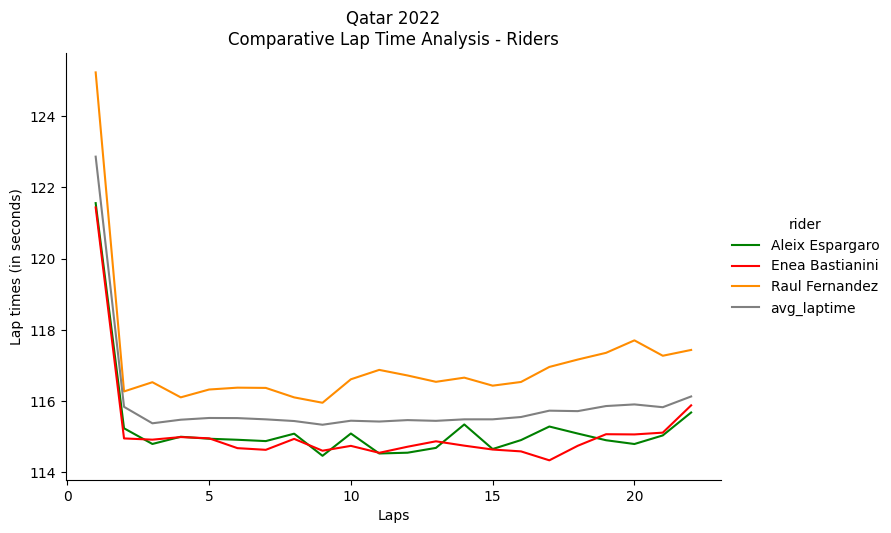

In [5]:
sns.relplot(data=laptimes_ridersQAT_melted[laptimes_ridersQAT_melted['rider'].isin(
    ['avg_laptime', 'Enea Bastianini', 'Aleix Espargaro', 'Raul Fernandez'])], 
            x='lap', y='laptime', hue='rider', kind='line', 
            palette=['green', 'red', 'darkorange', 'grey'], aspect=1.5)

plt.title("Qatar 2022\nComparative Lap Time Analysis - Riders")
plt.xlabel("Laps")
plt.ylabel("Lap times (in seconds)")
plt.show()

By projecting the *average lap time* (gray line), we can appreciate the general trend of the race. For example, in the case of Qatar, there is a decline in overall performance starting from the seventeenth lap. Similarly, there is a significant performance drop in the Italian Grand Prix race starting from the sixteenth lap. **This analysis helps to evaluate tire performance**.

Regarding the personal lap times of the riders, we can notice that both Enea Bastianini (who arrived in 1st place) and Aleix Espargaro (who arrived in 4th place) performed well below the average (gray line), unlike Raul Fernandez, for example (orange line), who consistently raced above the general average of the competition. Similar considerations can also be applied to the Italian Grand Prix, as shown below.

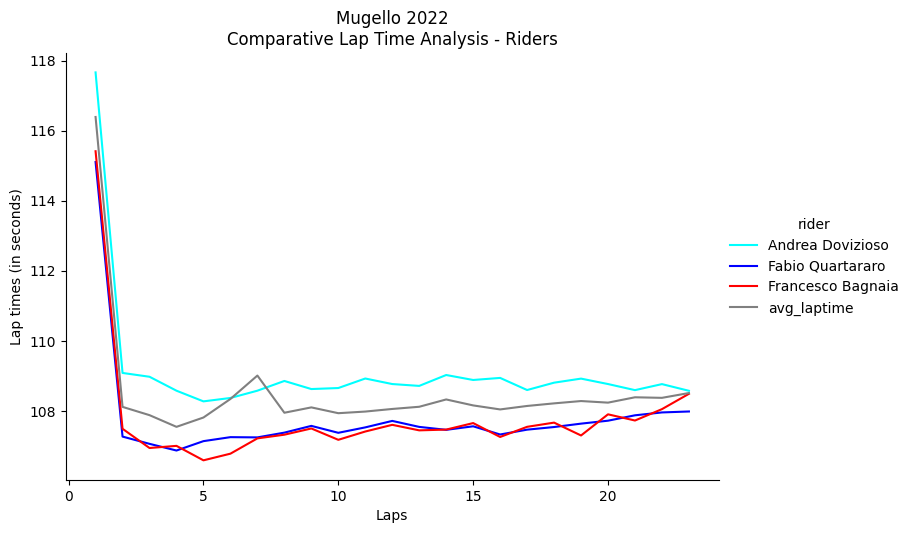

In [6]:
timesheetITA, laptimes_ridersITA, laptimes_teamsITA, laptimes_constructorsITA, performanceITA = ita2022.race_analysis(save_pdf=False, performance=True)
laptimes_ridersITA_melted = laptimes_ridersITA.melt(id_vars='lap', var_name='rider', value_name='laptime')

sns.relplot(data=laptimes_ridersITA_melted[laptimes_ridersITA_melted['rider'].isin(
    ['avg_laptime', 'Francesco Bagnaia', 'Fabio Quartararo', 'Andrea Dovizioso'])], 
            x='lap', y='laptime', hue='rider', kind='line', 
            palette=['aqua', 'blue', 'red', 'grey'], aspect=1.5)

plt.title("Mugello 2022\nComparative Lap Time Analysis - Riders")
plt.xlabel("Laps")
plt.ylabel("Lap times (in seconds)")
plt.show()

These graphs provide a visual and intuitive way to determine if a particular rider, team, or manufacturer has performed above, below, or at an average level. (It's important to note that the more a rider's lap times are below the average race's lap time, the faster they've gone). Using the same visualization concept for the constructors, we can see how Yamaha and KTM consistently performed above average in the Qatar 2022 race, thus indicating that they "underperformed" compared to the other manufacturers.

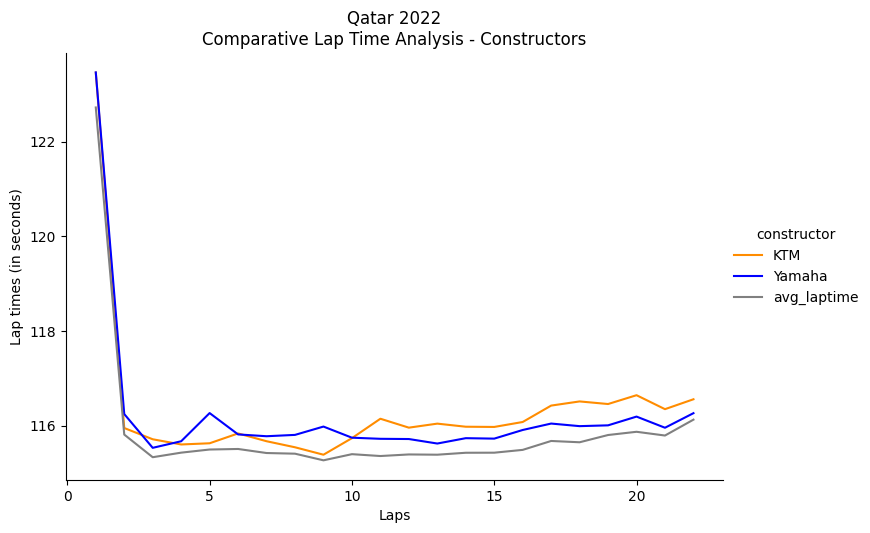

In [7]:
laptimes_constructorsQAT_melted = laptimes_constructorsQAT.melt(id_vars='lap', var_name='constructor', value_name='laptime')

sns.relplot(data=laptimes_constructorsQAT_melted[laptimes_constructorsQAT_melted['constructor'].isin(
    ['avg_laptime', 'Yamaha', 'KTM'])], 
            x='lap', y='laptime', hue='constructor', kind='line', 
            palette=['darkorange', 'blue', 'grey'], aspect=1.5)

plt.title("Qatar 2022\nComparative Lap Time Analysis - Constructors")
plt.xlabel("Laps")
plt.ylabel("Lap times (in seconds)")
plt.show()

### Sector times

In an aggregate manner, it is also possible to determine variation indicators for each sector of the circuit, thereby appreciating the overall level of consistency of the riders in the various sections of the track. For example, we can observe that in the case of the Qatar Grand Prix, the consistency of lap times in different sectors is almost identical, while at Mugello, the sector in which the riders were on average more consistent is T2.

In [8]:
std_race = pd.DataFrame(timesheetQAT[timesheetQAT['lap'] != 1][['t1', 't2', 't3', 't4']].std())
std_race = std_race.pivot_table(columns=std_race.index).round(2)
std_race.index = ['σ']
print("🇶🇦 Qatar Grand Prix 2022\nSector Pace:")
std_race

🇶🇦 Qatar Grand Prix 2022
Sector Pace:


,t1,t2,t3,t4
σ,0.21,0.23,0.21,0.21


In [9]:
std_race = pd.DataFrame(timesheetITA[timesheetITA['lap'] != 1][['t1', 't2', 't3', 't4']].std())
std_race = std_race.pivot_table(columns=std_race.index).round(2)
std_race.index = ['σ']
print("🇮🇹 Italian Grand Prix 2022\nSector pace:")
std_race

🇮🇹 Italian Grand Prix 2022
Sector pace:


,t1,t2,t3,t4
σ,0.46,0.24,0.74,0.45


The same principle of analysis can be applied to the fastest times set by riders in the different sectors of the track. At the Mugello Grand Prix, we can see, for example, how Yamaha, with Fabio Quartararo, was the fastest in T2 and T3. In contrast, the Ducatis of Bagnaia and Bastianini expressed the best times in the sectors with higher top speeds (T1 and T4) due to the long straights.

In [10]:
by_rider = timesheetITA[timesheetITA['lap'] != 1].groupby(['constructor', 'rider'])[['t1', 't2', 't3', 't4']].min().round(3)
rider_with_min = by_rider.idxmin()
const_t = pd.DataFrame({
    'rider': rider_with_min, 
    'fastest_time': by_rider.min()})
const_t[['constructor', 'rider']] = pd.DataFrame(const_t['rider'].tolist(), index=const_t.index)
print("🇮🇹 Italian Grand Prix 2022\nFastest sector times:\n")
print(const_t[['constructor', 'rider', 'fastest_time']])

🇮🇹 Italian Grand Prix 2022
Fastest sector times:

   constructor              rider  fastest_time
t1      Ducati  Francesco Bagnaia        24.868
t2      Yamaha   Fabio Quartararo        22.499
t3      Yamaha   Fabio Quartararo        34.842
t4      Ducati    Enea Bastianini        23.998


In general, analyzing sector times under different measures of aggregation (average time, minimum, maximum, consistency in terms of standard deviation, etc.) can reveal interesting points of comparison to evaluate the adaptation to the track of riders, teams, and constructors.

## Performance analysis

Although an analysis of times like this already gives a clearer idea of the general trend of the race, it alone cannot provide an answer to our initial question. In fact, to quantify riders' performances, it is necessary to deepen the analysis and develop quantitative indicators.

### The Performance Matrix

Motorsports performance, can be defined as "*how consistently fast a rider/driver has been*" - relative to the number of laps completed. Therefore, at a conceptual level, the so-called "pace" can be theorized as the aggregation of two fundamental variables: consistency and speed. To achieve high positions in the rankings, a rider must in fact be both fast and consistent.

Visually, the relationship between these two variables can be demonstrated with the help of a matrix - shown below - which we will call "performance matrix". The graph represents the ratio between the two indicators (*relative speed* on the y-axis and *relative consistency* on the x-axis) for each participant in the race, in relation to the average located at the axes $x,y=0$ (black lines). This means that the performance of the riders located in the upper-right quadrant of the graph are above average, both in terms of speed and consistency. Conversely, those located in the lower-left quadrant have "underperformed" below average (for both variables).

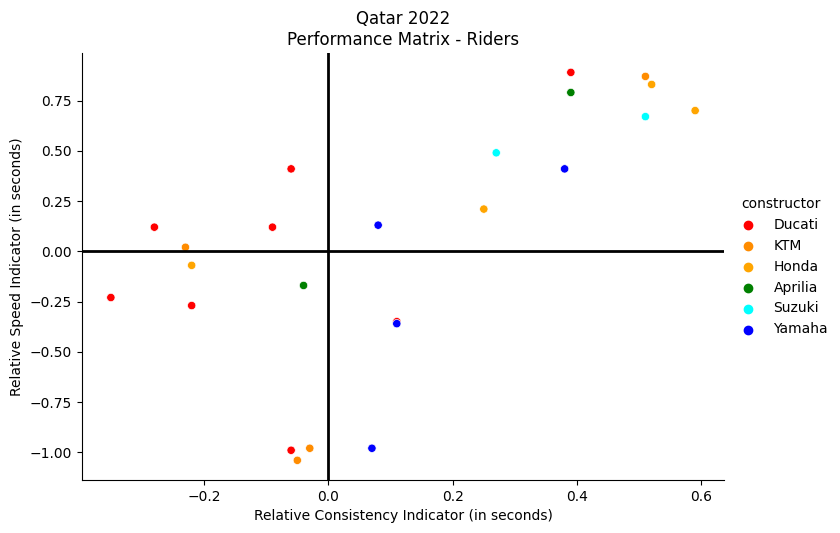

In [11]:
perf_cols = ['rider', 'constructor', 'grid', 'position', 'pos_delta', 'points', 'avg_laptime', 'avg_speed', 'delta_avg_laptime', 'pace_speed_index', 'delta_std_laptime', 'pace_consistency_index', 'performance_index']
performanceQAT = performanceQAT[perf_cols].set_index('rider').round(2)
performanceITA = performanceITA[perf_cols].set_index('rider').round(2)
performanceITA.loc[performanceITA.index == 'Lorenzo Savadori', 'constructor'] = 'Aprilia'

sns.relplot(data=performanceQAT, 
            x='pace_consistency_index', 
            y='pace_speed_index', hue='constructor', 
            palette=['red', 'darkorange', 'orange', 'green', 'aqua', 'blue'], 
            # size='points', 
            # sizes=[30, 80], 
            # alpha=0.8, 
            legend='brief', aspect=1.5)

plt.title("Qatar 2022\nPerformance Matrix - Riders")
plt.xlabel("Relative Consistency Indicator (in seconds)")
plt.ylabel("Relative Speed Indicator (in seconds)")

plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
plt.axvline(x=0, color='black', linestyle='-', linewidth=2)

plt.show()

In the case of Qatar, we can see how this graph helps us clearly visualize the struggle of the Ducati teams in having a consistent pace (with the exception of the winner, Bastianini). The Suzuki team had a good overall performance, both in terms of speed and consistency.

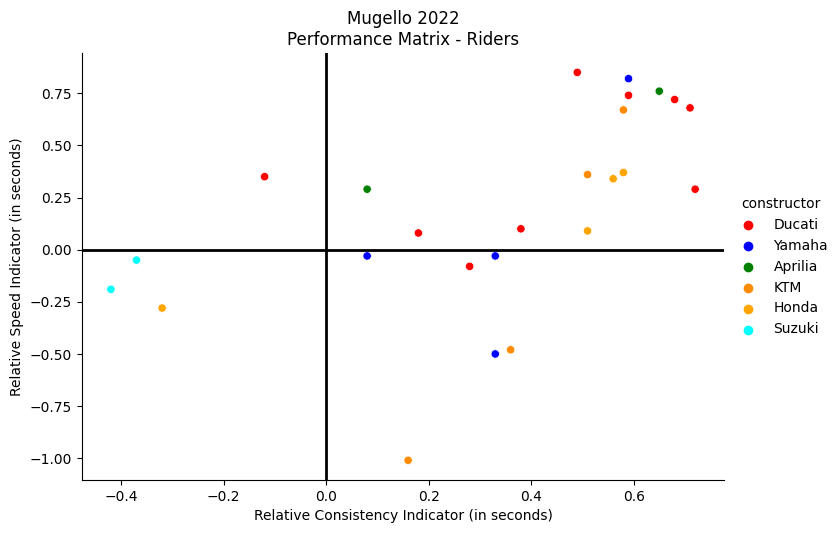

In [12]:
sns.relplot(data=performanceITA[performanceITA['performance_index'] > -3], 
            x='pace_consistency_index', 
            y='pace_speed_index', hue='constructor', 
            palette=['red', 'blue', 'green', 'darkorange', 'orange', 'aqua'], 
            # size='points', 
            # sizes=[30, 80], 
            # alpha=0.8, 
            legend='brief', aspect=1.5)

plt.title("Mugello 2022\nPerformance Matrix - Riders")
plt.xlabel("Relative Consistency Indicator (in seconds)")
plt.ylabel("Relative Speed Indicator (in seconds)")

plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
plt.axvline(x=0, color='black', linestyle='-', linewidth=2)

plt.show()

At Mugello, it's interesting to note how the riders who scored points are all grouped in the upper-right quadrant, which means their values for speed and consistency were above average (confirming the demonstrated relationship between the two variables). Only Quartararo (who finished second) demonstrated both consistency and speed among the Yamaha riders, while the other three Yamahas suffered from a noticeable lack of speed that prevented them from scoring points. The Ducati team had a good overall performance, with most of their riders largely confirming their high performance usually demonstrated at their home circuit.

### A performance-based ranking

The two variables quantifying the race pace can be combined to create an index that summarizes a rider's performance in a single value. We will call this a "performance indicator": an aggregation of the speed and consistency values of a competitor.

The following table shows the results of the Qatar race along with these indicators. Specifically, from left to right, it includes the starting position, finishing position, difference in positions at the finish, points earned, speed indicator, consistency indicator, and the aggregated performance indicator. This results table, ordered by the latter variable, presents a "revisited" ranking based on the performance demonstrated by the riders regardless of the final result and events of the race.

In [13]:
perfQAT = performanceQAT.drop(columns=[
    'avg_speed', 'avg_laptime', 'delta_avg_laptime',
    'delta_std_laptime']).sort_values('performance_index', ascending=False).reset_index()
perfQAT.index += 1
perfQAT.drop(columns='constructor')

,rider,grid,position,pos_delta,points,pace_speed_index,pace_consistency_index,performance_index
1,Brad Binder,7,2.0,5.0,20,0.87,0.51,0.69
2,Pol Espargaro,6,3.0,3.0,16,0.83,0.52,0.67
3,Enea Bastianini,2,1.0,1.0,25,0.89,0.39,0.64
4,Marc Marquez,3,5.0,-2.0,11,0.70,0.59,0.64
5,Aleix Espargaro,5,4.0,1.0,13,0.79,0.39,0.59
6,Joan Mir,8,6.0,2.0,10,0.67,0.51,0.59
7,Fabio Quartararo,11,9.0,2.0,7,0.41,0.38,0.40
8,Alex Rins,10,7.0,3.0,9,0.49,0.27,0.38
9,Takaaki Nakagami,6,10.0,-4.0,6,0.21,0.25,0.23
10,Johann Zarco,3,8.0,-5.0,8,0.41,-0.06,0.17


In this "new" ranking (sorted by the aggregated performance indicator), it is interesting to note that the winner (Enea Bastianini), who dominated the race from the first position since the beginning, is relegated to the third position behind Brad Binder and Pol Espargaro. This is due to the fact that these two riders have shown to have a greater speed and consistency than Enea, who, apart from the victory, has equalled the performance of Marc Marquez.

The same concept is applied to the race performances of the constructors in the following table.

,pace_speed_index,pace_consistency_index,performance_index
constructor,,,
Suzuki,0.58,0.39,0.48
Honda,0.42,0.28,0.35
Aprilia,0.31,0.18,0.24
Yamaha,-0.20,0.16,-0.02
Ducati,-0.04,-0.07,-0.06
KTM,-0.28,0.05,-0.12


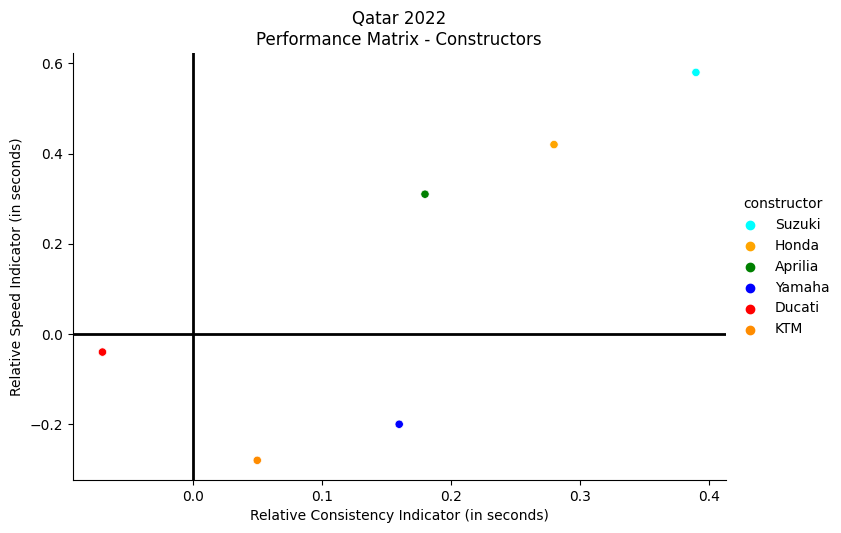

In [14]:
perfQAT_constr = perfQAT.groupby('constructor')[['pace_speed_index', 'pace_consistency_index', 'performance_index']].mean().sort_values('performance_index', ascending=False).round(2)
# perfQAT_constr = perfQAT_constr.sort_values('performance_index', ascending=False).reset_index()
# perfQAT_constr.index += 1
display(perfQAT_constr)

sns.relplot(data=perfQAT_constr, 
            x='pace_consistency_index', 
            y='pace_speed_index', hue='constructor', 
            palette=['aqua', 'orange', 'green', 'blue', 'red', 'darkorange'], 
            # size='points', 
            # sizes=[30, 80], 
            # alpha=0.8, 
            legend='brief', aspect=1.5)

plt.title("Qatar 2022\nPerformance Matrix - Constructors")
plt.xlabel("Relative Consistency Indicator (in seconds)")
plt.ylabel("Relative Speed Indicator (in seconds)")

plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
plt.axvline(x=0, color='black', linestyle='-', linewidth=2)

plt.show()

As we can see, thanks in part to the performance matrix applied to the constructors, Suzuki was the most "performant" motorcycle in Qatar 2022, along with Honda and Aprilia. Ducati, Yamaha, and KTM had inferior performances.

## Conclusion

For the purpose of providing more technical and structured information to motorsports fans, we have demonstrated in this article how public data can be used to extract important insights on race and competitors performance. While the race results remain undoubtedly the reference for assigning race points, it is still crucial to be able to objectively measure and evaluate the pace of each rider, regardless of the outcome at the checkered flag and all the race events. By examining two MotoGP races in the 2022 season, we first established the **importance of visually analyzing the race progression** in terms of lap times in order to:

* Examine the overall **evolution of tire performance and degradation**;
* **Compare** the **lap time** evolution of riders, teams, and constructors (also in relation to the race average).

We then demonstrated how lap data can be used to analyze the adaptation of riders, teams, and constructors to different track segments, with the help of aggregate metrics for intermediate sector times.

Finally, we demonstrated the usefulness of **quantifying the performances** of riders, teams, and constructors through **quantitative indicators** that take into account **relative speed and consistency**, the two fundamental variables in a theoretical definition of performance.

In conclusion, the research findings confirm the validity of the initial hypothesis and provide a satisfying answer to the questions that were posed at the beginning of the investigation. It is also believed that this study constitutes an important starting point for the creation of an engaging technical information format for motor racing. The ultimate goal is to promote a constructive and informed debate among industry experts and enthusiasts, providing objective information that allows for statistical evaluation of the performances of riders and vehicles. In this way, we could contribute to fostering a more aware and informed motor racing culture, capable of fully appreciating the technical complexity of this type of sport, especially for those more demanding fans.